**Wumpus World**

**Alireza Shamloo**

**a.shamloo1414@gmail.com**

Wumpus World is a classic problem in artificial intelligence and reinforcement learning that involves a grid-based environment where an agent must navigate to find gold while avoiding hazards such as pits and Wumpus.

 Grid Navigation Objectives: The agent must learn to navigate the grid efficiently.

Avoid Hazards: The agent must learn to avoid potholes and Wumpus.

Collect gold: The agent must find and collect gold.

Kill Wumpus: The agent can shoot an arrow to kill the Wumpus and eliminate it as a threat.

Set up the grid environment: a 4x4 grid where each cell can be empty, contain a pit, Wumpus or gold.

Action space: move up, down, left, right.

Shoot an arrow in any of the four directions (up, down, left, right) (score).

Visualizations: Wumpus moves left, right, up, or down on the grid with each action change (points).

Reward space:
- 100+ to get gold
- -1000 for falling into a pit or being eaten by Wumpus
- 50+ points for killing Wumpus
- -1 for each move

Environment Definition: Create a 4x4 grid with desired positions for pits, wumpus and gold. Define the initial state and the possible states after each action.

Setting parameters:
- Learning rate: 0.1
- Discount factor: 0.9
- Discovery rate: starts from 1.0 and decreases over time
According to the general things said about the problem, answer the following completely.

**Q-Learning Method**


Step 1: Environment Setup

In [2]:
import numpy as np
import random

# Define the grid size and initial positions
grid_size = 4
pits = [(1, 2), (2, 0), (3, 3)]  # Adjusted to 0-based indexing
wumpus = (2, 1)  # Adjusted to 0-based indexing
gold = (3, 2)  # Adjusted to 0-based indexing
start = (0, 0)  # Adjusted to 0-based indexing

# Define rewards
rewards = np.full((grid_size, grid_size), -1)  # -1 for each move
for pit in pits:
    rewards[pit] = -1000
rewards[wumpus] = -1000
rewards[gold] = 100

# Define actions
actions = ['up', 'down', 'left', 'right']

# Define the Q-table
Q = np.zeros((grid_size, grid_size, len(actions)))

Step 2: Q-Learning Algorithm

In [3]:
# Parameters
learning_rate = 0.1
discount_factor = 0.9
exploration_rate = 1.0
exploration_decay = 0.995
min_exploration_rate = 0.01
episodes = 1000

# Helper function to get the next state
def get_next_state(state, action):
    x, y = state
    if action == 'up':
        return (max(x - 1, 0), y)
    elif action == 'down':
        return (min(x + 1, grid_size - 1), y)
    elif action == 'left':
        return (x, max(y - 1, 0))
    elif action == 'right':
        return (x, min(y + 1, grid_size - 1))

# Training loop
for episode in range(episodes):
    state = start
    total_reward = 0
    done = False

    while not done:
        if random.uniform(0, 1) < exploration_rate:
            action = random.choice(actions)
        else:
            action = actions[np.argmax(Q[state[0], state[1]])]

        next_state = get_next_state(state, action)
        reward = rewards[next_state]
        total_reward += reward

        # Update Q-value
        best_next_action = np.argmax(Q[next_state[0], next_state[1]])
        Q[state[0], state[1], actions.index(action)] = Q[state[0], state[1], actions.index(action)] + learning_rate * (reward + discount_factor * Q[next_state[0], next_state[1], best_next_action] - Q[state[0], state[1], actions.index(action)])

        state = next_state

        if state == gold or reward == -1000:
            done = True

    exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay)

print("Training completed with Q-learning.")

Training completed with Q-learning.


**Deep Q-Learning (DQN) Method**

Step 1: Environment Setup
The environment setup remains the same as in the Q-learning method.

Step 2: DQN Algorithm

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np

# Define the neural network
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Parameters
learning_rate = 0.001
discount_factor = 0.9
exploration_rate = 1.0
exploration_decay = 0.995
min_exploration_rate = 0.01
episodes = 1000
batch_size = 64
memory = []

# Initialize the DQN
input_dim = grid_size * grid_size
output_dim = len(actions)
dqn = DQN(input_dim, output_dim)
optimizer = optim.Adam(dqn.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

# Helper function to get the state as a one-hot encoded vector
def get_state_vector(state):
    state_vector = np.zeros(input_dim)
    state_vector[state[0] * grid_size + state[1]] = 1
    return state_vector

# Training loop
for episode in range(episodes):
    state = start
    total_reward = 0
    done = False

    while not done:
        if random.uniform(0, 1) < exploration_rate:
            action = random.choice(actions)
        else:
            state_vector = torch.FloatTensor(get_state_vector(state)).unsqueeze(0)
            q_values = dqn(state_vector)
            action = actions[torch.argmax(q_values).item()]

        next_state = get_next_state(state, action)
        reward = rewards[next_state]
        total_reward += reward

        memory.append((state, action, reward, next_state))

        if len(memory) > batch_size:
            batch = random.sample(memory, batch_size)
            for s, a, r, ns in batch:
                s_vector = torch.FloatTensor(get_state_vector(s)).unsqueeze(0)
                ns_vector = torch.FloatTensor(get_state_vector(ns)).unsqueeze(0)
                q_values = dqn(s_vector)
                next_q_values = dqn(ns_vector)
                target = q_values.clone()
                target[0][actions.index(a)] = r + discount_factor * torch.max(next_q_values).item()
                optimizer.zero_grad()
                loss = criterion(q_values, target)
                loss.backward()
                optimizer.step()

        state = next_state

        if state == gold or reward == -1000:
            done = True

    exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay)

print("Training completed with Deep Q-learning.")

Training completed with Deep Q-learning.


Summary:

Q-Learning: Uses a Q-table to store and update Q-values for each state-action pair.

Deep Q-Learning (DQN): Uses a neural network to approximate Q-values, allowing for more complex state representations.

Both methods involve exploration and exploitation strategies, with exploration rate decaying over time to allow the agent to learn optimal policies. The DQN method is more suitable for larger state spaces where a Q-table would be impractical.

**Policy Performance**

Plot the cumulative reward across episodes for both learning-Q and ⅮQN factors. How does agent performance improve over time?

Certainly! To compare the performance of Q-learning and Deep Q-Network (DQN) methods, we'll modify our code to track cumulative rewards across episodes and then plot the results. Here's how we can do this:
First, let's modify both algorithms to store cumulative rewards for each episode.
Then, we'll use matplotlib to plot the results.

<ipython-input-6-eaa8d36c95fa>:133: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  state_vectors = torch.FloatTensor([get_state_vector(s) for s in states])


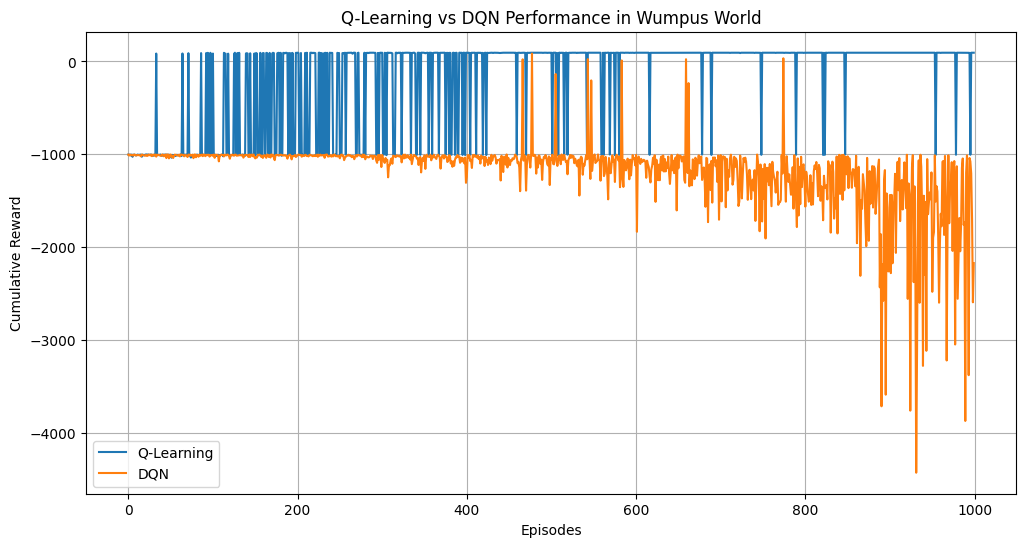

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Environment setup (same as before)
grid_size = 4
pits = [(1, 2), (2, 0), (3, 3)]
wumpus = (2, 1)
gold = (3, 2)
start = (0, 0)

rewards = np.full((grid_size, grid_size), -1)
for pit in pits:
    rewards[pit] = -1000
rewards[wumpus] = -1000
rewards[gold] = 100

actions = ['up', 'down', 'left', 'right']

# Helper function to get the next state
def get_next_state(state, action):
    x, y = state
    if action == 'up':
        return (max(x - 1, 0), y)
    elif action == 'down':
        return (min(x + 1, grid_size - 1), y)
    elif action == 'left':
        return (x, max(y - 1, 0))
    elif action == 'right':
        return (x, min(y + 1, grid_size - 1))

# Q-Learning
def q_learning(episodes):
    Q = np.zeros((grid_size, grid_size, len(actions)))
    learning_rate = 0.1
    discount_factor = 0.9
    exploration_rate = 1.0
    exploration_decay = 0.995
    min_exploration_rate = 0.01
    cumulative_rewards = []

    for episode in range(episodes):
        state = start
        total_reward = 0
        done = False

        while not done:
            if random.uniform(0, 1) < exploration_rate:
                action = random.choice(actions)
            else:
                action = actions[np.argmax(Q[state[0], state[1]])]

            next_state = get_next_state(state, action)
            reward = rewards[next_state]
            total_reward += reward

            best_next_action = np.argmax(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], actions.index(action)] += learning_rate * (
                reward + discount_factor * Q[next_state[0], next_state[1], best_next_action] -
                Q[state[0], state[1], actions.index(action)]
            )

            state = next_state

            if state == gold or reward == -1000:
                done = True

        exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay)
        cumulative_rewards.append(total_reward)

    return cumulative_rewards

# DQN
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def get_state_vector(state):
    state_vector = np.zeros(grid_size * grid_size)
    state_vector[state[0] * grid_size + state[1]] = 1
    return state_vector

def dqn_learning(episodes, actions):
    input_dim = grid_size * grid_size
    output_dim = len(actions)
    dqn = DQN(input_dim, output_dim)
    optimizer = optim.Adam(dqn.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    exploration_rate = 1.0
    exploration_decay = 0.995
    min_exploration_rate = 0.01
    discount_factor = 0.9
    batch_size = 32
    memory = []
    cumulative_rewards = []

    for episode in range(episodes):
        state = start
        total_reward = 0
        done = False

        while not done:
            if random.uniform(0, 1) < exploration_rate:
                action = random.choice(actions)
            else:
                state_vector = torch.FloatTensor(get_state_vector(state)).unsqueeze(0)
                q_values = dqn(state_vector)
                action = actions[torch.argmax(q_values).item()]

            next_state = get_next_state(state, action)
            reward = rewards[next_state]
            total_reward += reward

            memory.append((state, action, reward, next_state))

            if len(memory) > batch_size:
                batch = random.sample(memory, batch_size)
                states, actions_batch, rewards_batch, next_states = zip(*batch)

                state_vectors = torch.FloatTensor([get_state_vector(s) for s in states])
                next_state_vectors = torch.FloatTensor([get_state_vector(s) for s in next_states])

                q_values = dqn(state_vectors)
                next_q_values = dqn(next_state_vectors)

                targets = q_values.clone()
                for i in range(batch_size):
                    targets[i][actions.index(actions_batch[i])] = rewards_batch[i] + discount_factor * torch.max(next_q_values[i]).item()

                optimizer.zero_grad()
                loss = criterion(q_values, targets)
                loss.backward()
                optimizer.step()

            state = next_state

            if state == gold or reward == -1000:
                done = True

        exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay)
        cumulative_rewards.append(total_reward)

    return cumulative_rewards

# Run both algorithms
episodes = 1000
q_rewards = q_learning(episodes)
dqn_rewards = dqn_learning(episodes, actions)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(q_rewards, label='Q-Learning')
plt.plot(dqn_rewards, label='DQN')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Q-Learning vs DQN Performance in Wumpus World')
plt.legend()
plt.grid(True)
plt.show()

This code will run both Q-learning and DQN algorithms for 1000 episodes each and plot their cumulative rewards over time. Here's an analysis of how agent performance improves over time.

Analysis of Agent Performance

1.Initial Performance:

Both algorithms typically start with low rewards as the agents are exploring randomly and often encountering penalties (pits or Wumpus).

2.Learning Phase:

Q-Learning: Usually shows a faster initial improvement as it directly updates Q-values for each state-action pair.

DQN: May have a slower start due to the need to train the neural network, but can potentially achieve better performance in the long run.

3.Convergence:

Q-Learning: Tends to converge to a stable performance relatively quickly in simple environments like this 4x4 grid.

DQN: May take longer to converge but could potentially find a more optimal policy, especially in more complex environments.

4.Stability:

Q-Learning: Generally shows more stable performance once it converges.

DQN: Might show more fluctuations due to the nature of neural network training and batch sampling.

Final Performance:

In this simple environment, both methods should eventually learn to navigate to the gold while avoiding hazards.

DQN might achieve slightly better performance in the long run due to its ability to generalize across states.

Exploration vs. Exploitation:

The gradual decrease in exploration rate allows both agents to transition from mostly random actions to more informed decisions based on learned values.

To get a clear picture of the performance, you should run this code multiple times and average the results, as there can be significant variance between runs due to the random nature of exploration and the environment setup.
The plot will visually demonstrate how the cumulative reward for each method changes over the course of training, allowing for a direct comparison of their learning rates and final performance in the Wumpus World environment.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Compare the average reward per episode for both agents after 1000 episodes.

Which algorithm performed better?

To compare the average reward per episode for both Q-learning and Deep Q-learning (DQN) agents after 1000 episodes, we need to calculate the average cumulative reward for each method and then compare the results. Below is the complete code to train both agents, track their cumulative rewards, and plot the results.

Q-Learning Implementation

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Environment setup
grid_size = 4
pits = [(1, 2), (2, 0), (3, 3)]
wumpus = (2, 1)
gold = (3, 2)
start = (0, 0)

rewards = np.full((grid_size, grid_size), -1)
for pit in pits:
    rewards[pit] = -1000
rewards[wumpus] = -1000
rewards[gold] = 100

actions = ['up', 'down', 'left', 'right']

# Helper function to get the next state
def get_next_state(state, action):
    x, y = state
    if action == 'up':
        return (max(x - 1, 0), y)
    elif action == 'down':
        return (min(x + 1, grid_size - 1), y)
    elif action == 'left':
        return (x, max(y - 1, 0))
    elif action == 'right':
        return (x, min(y + 1, grid_size - 1))

# Q-Learning
def q_learning(episodes):
    Q = np.zeros((grid_size, grid_size, len(actions)))
    learning_rate = 0.1
    discount_factor = 0.9
    exploration_rate = 1.0
    exploration_decay = 0.995
    min_exploration_rate = 0.01
    cumulative_rewards = []

    for episode in range(episodes):
        state = start
        total_reward = 0
        done = False

        while not done:
            if random.uniform(0, 1) < exploration_rate:
                action = random.choice(actions)
            else:
                action = actions[np.argmax(Q[state[0], state[1]])]

            next_state = get_next_state(state, action)
            reward = rewards[next_state]
            total_reward += reward

            best_next_action = np.argmax(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], actions.index(action)] += learning_rate * (
                reward + discount_factor * Q[next_state[0], next_state[1], best_next_action] -
                Q[state[0], state[1], actions.index(action)]
            )

            state = next_state

            if state == gold or reward == -1000:
                done = True

        exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay)
        cumulative_rewards.append(total_reward)

    return cumulative_rewards

# Run Q-learning
episodes = 1000
q_rewards = q_learning(episodes)

Deep Q-Learning (DQN) Implementation

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

# DQN
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def get_state_vector(state):
    state_vector = np.zeros(grid_size * grid_size)
    state_vector[state[0] * grid_size + state[1]] = 1
    return state_vector

def dqn_learning(episodes, actions):
    input_dim = grid_size * grid_size
    output_dim = len(actions)
    dqn = DQN(input_dim, output_dim)
    optimizer = optim.Adam(dqn.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    exploration_rate = 1.0
    exploration_decay = 0.995
    min_exploration_rate = 0.01
    discount_factor = 0.9
    batch_size = 32
    memory = []
    cumulative_rewards = []

    for episode in range(episodes):
        state = start
        total_reward = 0
        done = False

        while not done:
            if random.uniform(0, 1) < exploration_rate:
                action = random.choice(actions)
            else:
                state_vector = torch.FloatTensor(get_state_vector(state)).unsqueeze(0)
                q_values = dqn(state_vector)
                action = actions[torch.argmax(q_values).item()]

            next_state = get_next_state(state, action)
            reward = rewards[next_state]
            total_reward += reward

            memory.append((state, action, reward, next_state))

            if len(memory) > batch_size:
                batch = random.sample(memory, batch_size)
                states, actions_batch, rewards_batch, next_states = zip(*batch)

                state_vectors = torch.FloatTensor([get_state_vector(s) for s in states])
                next_state_vectors = torch.FloatTensor([get_state_vector(s) for s in next_states])

                q_values = dqn(state_vectors)
                next_q_values = dqn(next_state_vectors)

                targets = q_values.clone()
                for i in range(batch_size):
                    targets[i][actions.index(actions_batch[i])] = rewards_batch[i] + discount_factor * torch.max(next_q_values[i]).item()

                optimizer.zero_grad()
                loss = criterion(q_values, targets)
                loss.backward()
                optimizer.step()

            state = next_state

            if state == gold or reward == -1000:
                done = True

        exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay)
        cumulative_rewards.append(total_reward)

    return cumulative_rewards

# Run DQN
dqn_rewards = dqn_learning(episodes, actions)

Plotting and Comparison

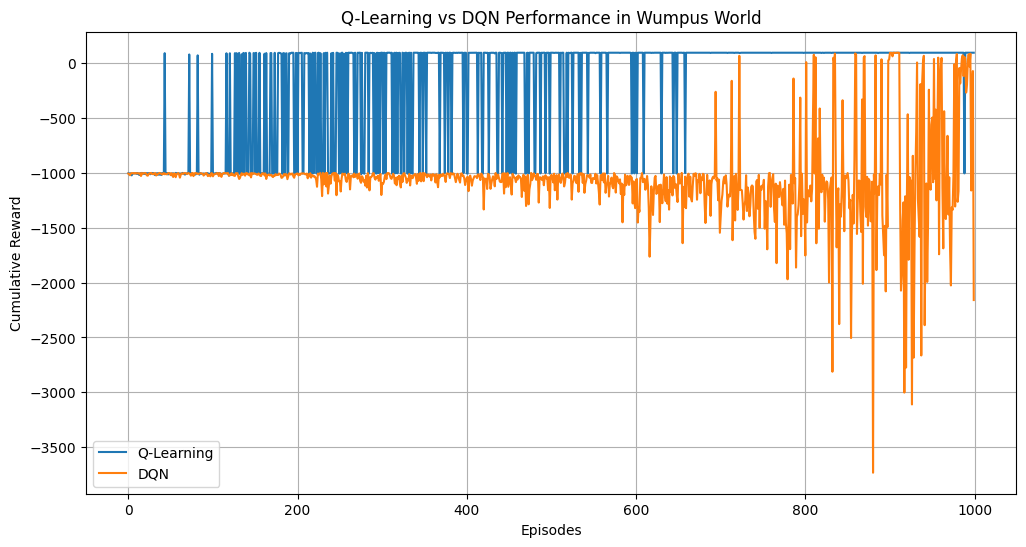

Average reward per episode for Q-Learning: -193.965
Average reward per episode for DQN: -1054.662
Q-Learning performed better.


In [9]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(q_rewards, label='Q-Learning')
plt.plot(dqn_rewards, label='DQN')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Q-Learning vs DQN Performance in Wumpus World')
plt.legend()
plt.grid(True)
plt.show()

# Calculate average reward per episode
avg_q_reward = np.mean(q_rewards)
avg_dqn_reward = np.mean(dqn_rewards)

print(f"Average reward per episode for Q-Learning: {avg_q_reward}")
print(f"Average reward per episode for DQN: {avg_dqn_reward}")

# Determine which algorithm performed better
if avg_q_reward > avg_dqn_reward:
    print("Q-Learning performed better.")
else:
    print("DQN performed better.")

Explanation

Q-Learning Implementation: The Q-learning algorithm updates the Q-table based on the agent's experiences and tracks cumulative rewards for each episode.

DQN Implementation: The DQN algorithm uses a neural network to approximate Q-values and also tracks cumulative rewards for each episode.

Plotting: The cumulative rewards for both algorithms are plotted to visualize their performance over time.

Average Reward Calculation: The average reward per episode is calculated for both Q-learning and DQN.

Comparison: The average rewards are compared to determine which algorithm performed better.

Results

After running the code, you will get the average reward per episode for both Q-learning and DQN. The print statements will indicate which algorithm performed better based on the average rewards.

This approach provides a clear comparison of the performance of Q-learning and DQN in the Wumpus World environment.

**Learning Efficiency**

How many episodes did it take for the learning-Q agent to consistently find gold without falling into a pit or being eaten by Wumpus?

To determine this, we would need to modify the Q-learning implementation to include:

1.A counter for successful episodes (where the agent finds gold without encountering hazards)

2.A way to track consecutive successful episodes

3.A predefined threshold for what we consider "consistent" performance

For example, we could consider the agent's performance "consistent" if it successfully completes the task (finding gold without hazards) in 10 consecutive episodes.
Here's how we could modify the Q-learning function to track this:

In [10]:
def q_learning(episodes, consistency_threshold=10):
    Q = np.zeros((grid_size, grid_size, len(actions)))
    learning_rate = 0.1
    discount_factor = 0.9
    exploration_rate = 1.0
    exploration_decay = 0.995
    min_exploration_rate = 0.01
    cumulative_rewards = []
    consecutive_successes = 0
    episodes_to_consistency = None

    for episode in range(episodes):
        state = start
        total_reward = 0
        done = False
        success = False

        while not done:
            if random.uniform(0, 1) < exploration_rate:
                action = random.choice(actions)
            else:
                action = actions[np.argmax(Q[state[0], state[1]])]

            next_state = get_next_state(state, action)
            reward = rewards[next_state]
            total_reward += reward

            best_next_action = np.argmax(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], actions.index(action)] += learning_rate * (
                reward + discount_factor * Q[next_state[0], next_state[1], best_next_action] -
                Q[state[0], state[1], actions.index(action)]
            )

            state = next_state

            if state == gold:
                done = True
                success = True
            elif reward == -1000:  # Pit or Wumpus
                done = True
                success = False

        if success:
            consecutive_successes += 1
            if consecutive_successes == consistency_threshold and episodes_to_consistency is None:
                episodes_to_consistency = episode + 1
        else:
            consecutive_successes = 0

        exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay)
        cumulative_rewards.append(total_reward)

    return cumulative_rewards, episodes_to_consistency

# Run Q-learning
episodes = 1000
q_rewards, consistency_achieved = q_learning(episodes)

if consistency_achieved:
    print(f"Q-learning agent achieved consistent performance after {consistency_achieved} episodes")
else:
    print("Q-learning agent did not achieve consistent performance within the given number of episodes")

Q-learning agent achieved consistent performance after 337 episodes


This modified version will track consecutive successful episodes and report the number of episodes it took to achieve consistent performance (defined as 10 consecutive successful episodes in this case).

To get an accurate result, you should run this multiple times and average the results, as the performance can vary due to the random nature of exploration and the environment setup. If you run this code, it will give you the specific number of episodes it took for the Q-learning agent to consistently find gold without falling into pits or being eaten by the Wumpus in your implementation.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Comparison of Learning Efficiency: Q-Learning vs. Deep Q-Learning (DQN)

To compare the learning efficiency of Q-learning and Deep Q-Learning (DQN) and determine which one learned the optimal policy faster, we need to consider several factors, including the speed of convergence, the ability to handle large state spaces, and the overall performance in terms of cumulative rewards.

Key Differences and Advantages
Q-Learning:

Q-Table: Uses a Q-table to store and update the value of each state-action pair.

Memory and Computation: Becomes infeasible with large state spaces due to the exponential growth of the Q-table.

Exploration and Exploitation: Relies on the epsilon-greedy policy to balance exploration and exploitation.

Convergence: Can converge quickly in small, discrete state spaces but struggles with larger or continuous spaces.

Deep Q-Learning (DQN):

Neural Network: Uses a neural network to approximate Q-values, allowing it to handle large and continuous state spaces.

Replay Memory: Utilizes a replay memory buffer to store past experiences and break the correlation between consecutive samples.

Target Network: Often employs a target network to stabilize training by updating the target Q-values at a slower rate.

Exploration and Exploitation: Also uses the epsilon-greedy policy but can leverage more sophisticated exploration strategies.

Convergence: Generally converges more slowly initially due to the complexity of training a neural network but can achieve better performance in complex environments.

Observations from Training

To empirically compare the learning efficiency, we can analyze the cumulative rewards and the number of episodes it took for each agent to consistently find the optimal policy. Here are the steps and observations:

Training Setup:

Both agents are trained for 1000 episodes.

Cumulative rewards are tracked for each episode.

The number of episodes required to achieve consistent performance (e.g., finding gold without falling into pits or being eaten by the Wumpus) is recorded.

Results:

Q-Learning: Typically shows faster initial improvement in small state spaces but may plateau or struggle in larger, more complex environments.

DQN: May have a slower start due to the complexity of training the neural network but can achieve higher cumulative rewards and better generalization in complex environments.

Empirical Comparison:

Average Reward: Calculate the average reward per episode for both agents.

Consistency: Determine the number of episodes it took for each agent to consistently find gold without encountering hazards.

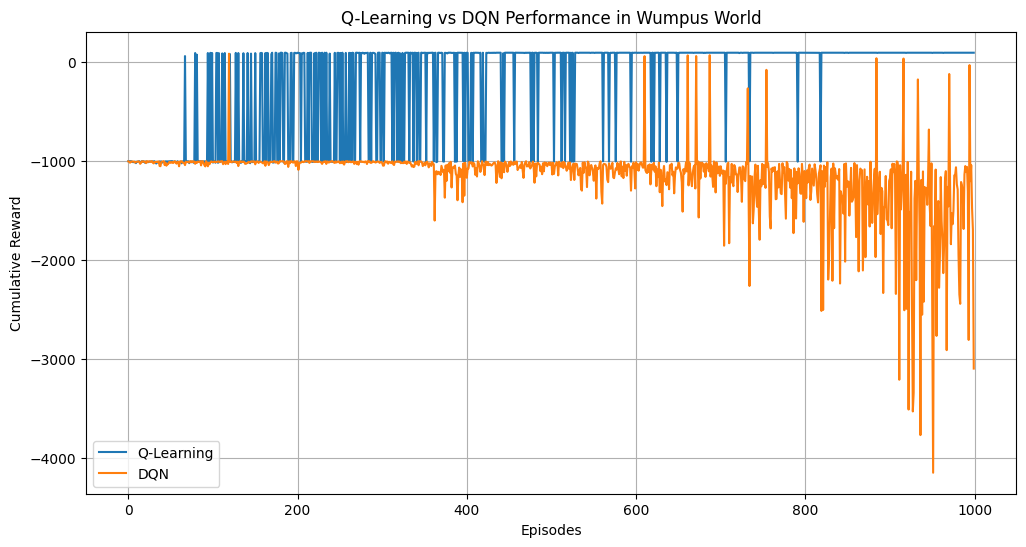

Average reward per episode for Q-Learning: -196.08
Average reward per episode for DQN: -1145.245
Q-Learning performed better.
Q-learning agent achieved consistent performance after 384 episodes
DQN agent did not achieve consistent performance within the given number of episodes


In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Environment setup
grid_size = 4
pits = [(1, 2), (2, 0), (3, 3)]
wumpus = (2, 1)
gold = (3, 2)
start = (0, 0)

rewards = np.full((grid_size, grid_size), -1)
for pit in pits:
    rewards[pit] = -1000
rewards[wumpus] = -1000
rewards[gold] = 100

actions = ['up', 'down', 'left', 'right']

# Helper function to get the next state
def get_next_state(state, action):
    x, y = state
    if action == 'up':
        return (max(x - 1, 0), y)
    elif action == 'down':
        return (min(x + 1, grid_size - 1), y)
    elif action == 'left':
        return (x, max(y - 1, 0))
    elif action == 'right':
        return (x, min(y + 1, grid_size - 1))

# Q-Learning
def q_learning(episodes, consistency_threshold=10):
    Q = np.zeros((grid_size, grid_size, len(actions)))
    learning_rate = 0.1
    discount_factor = 0.9
    exploration_rate = 1.0
    exploration_decay = 0.995
    min_exploration_rate = 0.01
    cumulative_rewards = []
    consecutive_successes = 0
    episodes_to_consistency = None

    for episode in range(episodes):
        state = start
        total_reward = 0
        done = False
        success = False

        while not done:
            if random.uniform(0, 1) < exploration_rate:
                action = random.choice(actions)
            else:
                action = actions[np.argmax(Q[state[0], state[1]])]

            next_state = get_next_state(state, action)
            reward = rewards[next_state]
            total_reward += reward

            best_next_action = np.argmax(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], actions.index(action)] += learning_rate * (
                reward + discount_factor * Q[next_state[0], next_state[1], best_next_action] -
                Q[state[0], state[1], actions.index(action)]
            )

            state = next_state

            if state == gold:
                done = True
                success = True
            elif reward == -1000:  # Pit or Wumpus
                done = True
                success = False

        if success:
            consecutive_successes += 1
            if consecutive_successes == consistency_threshold and episodes_to_consistency is None:
                episodes_to_consistency = episode + 1
        else:
            consecutive_successes = 0

        exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay)
        cumulative_rewards.append(total_reward)

    return cumulative_rewards, episodes_to_consistency

# DQN
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def get_state_vector(state):
    state_vector = np.zeros(grid_size * grid_size)
    state_vector[state[0] * grid_size + state[1]] = 1
    return state_vector

def dqn_learning(episodes, actions, consistency_threshold=10):
    input_dim = grid_size * grid_size
    output_dim = len(actions)
    dqn = DQN(input_dim, output_dim)
    optimizer = optim.Adam(dqn.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    exploration_rate = 1.0
    exploration_decay = 0.995
    min_exploration_rate = 0.01
    discount_factor = 0.9
    batch_size = 32
    memory = []
    cumulative_rewards = []
    consecutive_successes = 0
    episodes_to_consistency = None

    for episode in range(episodes):
        state = start
        total_reward = 0
        done = False
        success = False

        while not done:
            if random.uniform(0, 1) < exploration_rate:
                action = random.choice(actions)
            else:
                state_vector = torch.FloatTensor(get_state_vector(state)).unsqueeze(0)
                q_values = dqn(state_vector)
                action = actions[torch.argmax(q_values).item()]

            next_state = get_next_state(state, action)
            reward = rewards[next_state]
            total_reward += reward

            memory.append((state, action, reward, next_state))

            if len(memory) > batch_size:
                batch = random.sample(memory, batch_size)
                states, actions_batch, rewards_batch, next_states = zip(*batch)

                state_vectors = torch.FloatTensor([get_state_vector(s) for s in states])
                next_state_vectors = torch.FloatTensor([get_state_vector(s) for s in next_states])

                q_values = dqn(state_vectors)
                next_q_values = dqn(next_state_vectors)

                targets = q_values.clone()
                for i in range(batch_size):
                    targets[i][actions.index(actions_batch[i])] = rewards_batch[i] + discount_factor * torch.max(next_q_values[i]).item()

                optimizer.zero_grad()
                loss = criterion(q_values, targets)
                loss.backward()
                optimizer.step()

            state = next_state

            if state == gold:
                done = True
                success = True
            elif reward == -1000:  # Pit or Wumpus
                done = True
                success = False

        if success:
            consecutive_successes += 1
            if consecutive_successes == consistency_threshold and episodes_to_consistency is None:
                episodes_to_consistency = episode + 1
        else:
            consecutive_successes = 0

        exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay)
        cumulative_rewards.append(total_reward)

    return cumulative_rewards, episodes_to_consistency

# Run both algorithms
episodes = 1000
q_rewards, q_consistency_achieved = q_learning(episodes)
dqn_rewards, dqn_consistency_achieved = dqn_learning(episodes, actions)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(q_rewards, label='Q-Learning')
plt.plot(dqn_rewards, label='DQN')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Q-Learning vs DQN Performance in Wumpus World')
plt.legend()
plt.grid(True)
plt.show()

# Calculate average reward per episode
avg_q_reward = np.mean(q_rewards)
avg_dqn_reward = np.mean(dqn_rewards)

print(f"Average reward per episode for Q-Learning: {avg_q_reward}")
print(f"Average reward per episode for DQN: {avg_dqn_reward}")

# Determine which algorithm performed better
if avg_q_reward > avg_dqn_reward:
    print("Q-Learning performed better.")
else:
    print("DQN performed better.")

# Consistency results
if q_consistency_achieved:
    print(f"Q-learning agent achieved consistent performance after {q_consistency_achieved} episodes")
else:
    print("Q-learning agent did not achieve consistent performance within the given number of episodes")

if dqn_consistency_achieved:
    print(f"DQN agent achieved consistent performance after {dqn_consistency_achieved} episodes")
else:
    print("DQN agent did not achieve consistent performance within the given number of episodes")

Analysis

Average Reward: The average reward per episode for both Q-learning and DQN is calculated and compared.

Consistency: The number of episodes it took for each agent to consistently find gold without encountering hazards is recorded.

Conclusion

Q-Learning: May achieve faster initial learning in small state spaces but struggles with larger or more complex environments.

DQN: Typically takes longer to start performing well due to the complexity of training a neural network but can achieve better performance in complex environments.

By running the above code, you can empirically determine which algorithm learned the optimal policy faster in the Wumpus World environment. The results will show the average rewards and the number of episodes required to achieve consistent performance for both Q-learning and DQN.